In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import datetime
import os
#from os.path import isfile, join
import glob

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
savepath = '/home/marslast/Downloads/CTT/Wairio'
beeps = pd.read_pickle(os.path.join(savepath,'beeps.pkl'))
locs = pd.read_pickle(os.path.join(savepath,'nodeLocations.pkl'))

In [3]:
# List of nodes
nodes = np.unique(beeps.dropna().NodeId)
print(nodes)

['37506e' '375fb3' '3765fd' '376e52' '376f0d' '377107' '37736b' '377502'
 '3777d2' '377a20' '37852d' '378567' '37858f' '378932' '378a8a' '378d7b'
 '378f60' '379c29' '37a65b' '37a846' 'Station']


Tags Ellen put out (24/4/23 -- 19/05/23)
19523434
3466612D
66556134

Rat tags:
2A194B78 19/5/23 1530
332D7855 24/5/23 1500
19523434 21/6/23 1530

Stephen H
2D2D6166 1/6/23

In [4]:
ourtags = ['19523434','3466612D','66556134','2A194B78','332D7855','19523434','2D2D6166']
beeps = beeps[beeps.TagId.isin(ourtags)]
beeps.head()

,Time,RadioId,TagId,TagRSSI,NodeId,Validated
114186,2023-05-11 23:21:02,1,3466612D,-109,376f0d,0
114203,2023-05-11 23:21:46,1,3466612D,-69,37858f,0
114204,2023-05-11 23:22:00,1,3466612D,-69,37858f,0
114205,2023-05-11 23:22:15,1,3466612D,-69,37858f,0
114227,2023-05-11 23:22:26,1,3466612D,-106,377502,0


In [5]:
#beeps['Time'].duplicated()
multiples = beeps.pivot_table(index=['Time'], aggfunc='size').reset_index()
multiples.rename(columns={0: 'Counts'},inplace=True)
times = multiples[multiples.Counts>1].Time

<Axes: ylabel='Frequency'>

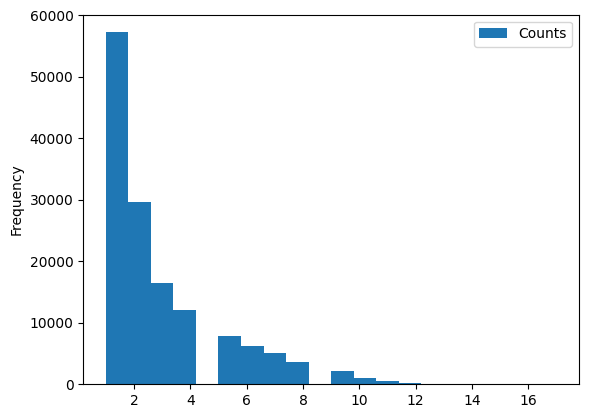

In [6]:
multiples.plot.hist(column='Counts',bins=20)

In [7]:
t = beeps['Time'].duplicated()
inds = np.where(t==True)
inds = inds[0][:500]
df = beeps.iloc[inds,:]

In [8]:
df = beeps.groupby(beeps['Time'])

In [9]:
df.head()

,Time,RadioId,TagId,TagRSSI,NodeId,Validated
114186,2023-05-11 23:21:02,1,3466612D,-109,376f0d,0
114203,2023-05-11 23:21:46,1,3466612D,-69,37858f,0
114204,2023-05-11 23:22:00,1,3466612D,-69,37858f,0
114205,2023-05-11 23:22:15,1,3466612D,-69,37858f,0
114227,2023-05-11 23:22:26,1,3466612D,-106,377502,0
...,...,...,...,...,...,...
205643,2023-06-16 04:22:39,1,2D2D6166,-103,377a20,0
205824,2023-06-16 04:22:39,1,2D2D6166,-106,37858f,0
205685,2023-06-16 04:22:39,1,2D2D6166,-108,376e52,0
205709,2023-06-16 04:22:54,1,2D2D6166,-108,378d7b,0


In [10]:
a = beeps[beeps.TagId==np.unique(beeps.TagId)[1]]
t = a['Time'].duplicated()
inds = np.where(t==True)
print(inds)

(array([    1,     5,     6, ..., 12667, 12668, 12669]),)


In [11]:
maxl = 0
time = ""
count = 0
for i in range(100):#len(inds[0])):
    if (a.Time.iloc[inds[0][i]] == time):
        count+=1
    else:
        if count>maxl:
            maxl = count
        count = 0
        time = a.Time.iloc[inds[0][i]]
        
print(maxl)

6


In [12]:
for t in np.unique(beeps.TagId):
    print(t, np.shape(beeps[beeps.TagId==t])[0])

2A194B78 53681
2D2D6166 12672
332D7855 271492
3466612D 58745


In [24]:
multiples[multiples.Counts>1]

,Time,Counts
9,2023-05-11 23:22:58,3
11,2023-05-11 23:23:13,2
13,2023-05-11 23:23:27,2
15,2023-05-11 23:23:42,2
17,2023-05-11 23:23:56,3
...,...,...
142424,2023-06-16 04:21:53,7
142426,2023-06-16 04:22:08,9
142427,2023-06-16 04:22:23,8
142428,2023-06-16 04:22:38,3


In [18]:
m = multiples.sort_values(by=['Counts'],ascending=False)
m.head()

,Time,Counts
32658,2023-05-19 09:51:35,17
28128,2023-05-19 04:23:56,16
29082,2023-05-19 05:23:11,16
29074,2023-05-19 05:22:32,16
29062,2023-05-19 05:21:40,16


In [19]:
t=multiples.iloc[32712,0]

In [20]:
d = beeps[beeps.Time==t]

Based on something like this, I want to (a) plot a circle around each location, (b) find the intersection, (c) guess the location

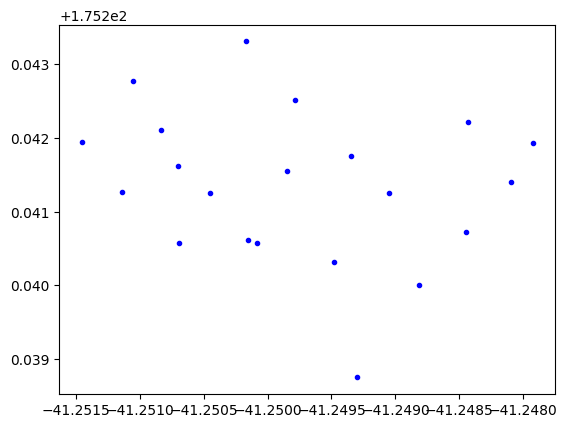

In [21]:
# These are the node (and station) locations
pl.plot(locs.Latitude,locs.Longitude,'b.');
# TODO -- think about which yagis

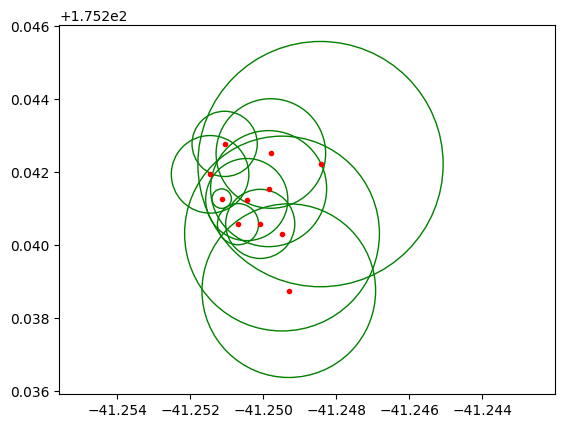

In [22]:
fig, ax = pl.subplots() 
# These are the node locations that were involved
dd = locs[locs.NodeId.isin(d.NodeId)]
ax.plot(dd.Latitude,dd.Longitude,'r.') 

for i in range(len(dd)):
    # Put a circle around each -- how to calibrate?! It's obviously not linear.
    rssi = d.TagRSSI[d.NodeId==dd.iloc[i,0]]
    #dist = (-rssi-40)/1.2
    dist = 10**((-20-rssi)/(10*4))
    circle = pl.Circle((dd.iloc[i,1],dd.iloc[i,2]), 0.00002*dist, color='g',fill=False)
    ax.add_patch(circle)

pl.axis('equal');

In [23]:
d

,Time,RadioId,TagId,TagRSSI,NodeId,Validated
311495,2023-05-19 09:54:58,1,2A194B78,-96,377a20,0
311432,2023-05-19 09:54:58,1,2A194B78,-95,37736b,0
311523,2023-05-19 09:54:58,1,2A194B78,-78,376f0d,0
311381,2023-05-19 09:54:58,1,2A194B78,-90,377107,0
311602,2023-05-19 09:54:58,1,2A194B78,-86,378f60,0
311664,2023-05-19 09:54:58,1,2A194B78,-105,37858f,0
311618,2023-05-19 09:54:58,1,2A194B78,-109,378d7b,0
311574,2023-05-19 09:54:58,1,2A194B78,-65,3765fd,0
311483,2023-05-19 09:54:58,1,2A194B78,-87,375fb3,0
311631,2023-05-19 09:54:58,1,2A194B78,-103,37a65b,0
